In [ ]:
import pandas as pd
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

# examples of each lesion for design data (contrast and size in title)
lesion_config_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/meta/config/spheres.xlsx"
lesion_config = pd.read_excel(lesion_config_path, "Version 3 final design")
gt_masks_dir_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/meta/data/with_lesions/gt_512x512/split"
gt_masks = os.listdir(gt_masks_dir_path)
gt_masks = [mask for mask in gt_masks if mask.endswith(".nii.gz")]
mask_opacity = 0
dicom_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/meta/data/with_lesions/spheres/old_gan_synth_Phm_origSize_20HU+_Intestin_Lung_Table_soft_211003_skaliert078_512x512x078' 
output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/lesion_examples images"
output_path_dir = os.path.join(output_path, os.path.basename(dicom_path))

if not os.path.exists(output_path_dir):
    os.mkdir(output_path_dir)

for gt_mask in gt_masks:
    name = gt_mask.split("_")[0]
    index = lesion_config.loc[lesion_config['name'] == name].index[0]
    contrast = lesion_config["C in HU"][index]
    radius = lesion_config["R in mm"][index]
    title = f"{name} ({contrast} HU, {radius} mm)"
    nii_path = os.path.join(gt_masks_dir_path, gt_mask)
    output_path_image = os.path.join(output_path_dir, f"{name}_{contrast}_{radius}.png") 
    overlay_dicom_nii_mask(dicom_path, nii_path, output_path_image, mask_opacity = mask_opacity, bb_mask=True, bb_mask_padding=15, title="")



In [ ]:
import pandas as pd
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

# examples of each lesion for scan data (contrast and size in title)
lesion_config_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/meta/config/spheres.xlsx"
lesion_config = pd.read_excel(lesion_config_path, "Version 3 final design")
gt_masks_dir_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/gt/CT4/lesions/split/"
gt_masks = os.listdir(gt_masks_dir_path)
gt_masks = [mask for mask in gt_masks if mask.endswith(".nii.gz")]
mask_opacity = 0
dicom_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/rawdata/rawdata_CT4/63_120_700_BODY-SHARP_AICE_192204.852' 
output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/lesion_examples images"
output_path_dir = os.path.join(output_path, os.path.basename(dicom_path))

if not os.path.exists(output_path_dir):
    os.mkdir(output_path_dir)

for gt_mask in gt_masks:
    name = gt_mask.split("_")[0]
    index = lesion_config.loc[lesion_config['name'] == name].index[0]
    contrast = lesion_config["C in HU"][index]
    radius = lesion_config["R in mm"][index]
    title = f"{name} ({contrast} HU, {radius} mm)"
    nii_path = os.path.join(gt_masks_dir_path, gt_mask)
    output_path_image = os.path.join(output_path_dir, f"{name}_{contrast}_{radius}.png") 
    overlay_dicom_nii_mask(dicom_path, nii_path, output_path_image, mask_opacity = mask_opacity, bb_mask=True, bb_mask_padding=15, title="")



In [ ]:
import nibabel as nib
import numpy as np
# create mask that shows the difference between design and scan data segmentation
mask_path_design_pred = "/home/uli/Documents/design_detection_phantom/pred/pred_print_templates_512x512_reg/043/512x512x078_scale078_version3 (input scaled)_reg.nii.gz"
mask_path_scan_pred = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/results/output_241_CT4/output_241_CT4_3d_fullres_tta_enabled_rep1/60_120_700_BODY-SHARP_AICE_191917.782.nii.gz"
output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots"

mask_design_pred = nib.load(mask_path_design_pred).get_fdata()
mask_scan_pred = nib.load(mask_path_scan_pred).get_fdata()
mask_diff_pred = np.zeros_like(mask_design_pred)
mask_diff_pred[mask_design_pred != mask_scan_pred] = 1
mask_scan_pred[mask_design_pred < 1] = 999
mask_design_pred[mask_design_pred < 1] = 1000
mask_diff_pred[mask_design_pred == mask_scan_pred] = 2

mask_diff_pred_nii = nib.Nifti1Image(mask_diff_pred, nib.load(mask_path_design_pred).affine)
output_path_image = os.path.join(output_path, "mask_diff_pred_043.nii.gz")
nib.save(mask_diff_pred_nii, output_path_image)


In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd
import os 

lesion_config_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/meta/config/spheres.xlsx"
lesion_config = pd.read_excel(lesion_config_path, "Version 3 final design")
gt_masks_dir_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/gt/CT4/lesions/split/"
gt_masks = os.listdir(gt_masks_dir_path)
gt_masks = [mask for mask in gt_masks if mask.endswith(".nii.gz")]
output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/gt/CT4/lesions/"

gt_mask_combined = None
for gt_mask in gt_masks:
    name = gt_mask.split("_")[0]
    index = lesion_config.loc[lesion_config['name'] == name].index[0]
    contrast = lesion_config["C in HU"][index]
    if contrast < -10:
        nii_path = os.path.join(gt_masks_dir_path, gt_mask)
        mask = nib.load(nii_path).get_fdata()
        if gt_mask_combined is None:
            gt_mask_combined = mask
        else:
            gt_mask_combined += mask

gt_mask_combined_nii = nib.Nifti1Image(gt_mask_combined, nib.load(nii_path).affine)
output_path_image = os.path.join(output_path, "gt_mask_<-10HU_combined_043.nii.gz")
nib.save(gt_mask_combined_nii, output_path_image)

# add liver mask to gt_mask_combined
liver_mask_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/gt/CT4/liver_segmentation_mask/62_120_700_BODY-SHARP_AICE_192059.462_just_liver_Lily+Paul.nii.gz"
liver_mask = nib.load(liver_mask_path).get_fdata()
gt_mask_combined += liver_mask
gt_mask_combined_nii = nib.Nifti1Image(gt_mask_combined, nib.load(liver_mask_path).affine)
output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/gt/CT4/merged"
output_path_image = os.path.join(output_path, "gt_mask_<-10HU_combined_043_with_liver.nii.gz")
nib.save(gt_mask_combined_nii, output_path_image)

In [ ]:
import nibabel as nib
import numpy as np
import pandas as pd

lesion_config_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/meta/config/spheres.xlsx"
lesion_config = pd.read_excel(lesion_config_path, "Version 3 (finale)")
gt_masks_dir_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/gt/CT4/lesions/split/"
gt_masks = os.listdir(gt_masks_dir_path)
gt_masks = [mask for mask in gt_masks if mask.endswith(".nii.gz")]
output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/gt/CT4/lesions/"

gt_mask_combined = None
for gt_mask in gt_masks:
    name = gt_mask.split("_")[0]
    index = lesion_config.loc[lesion_config['name'] == name].index[0]
    contrast = lesion_config["C in HU"][index]
    if contrast < -10:
        nii_path = os.path.join(gt_masks_dir_path, gt_mask)
        mask = nib.load(nii_path).get_fdata()
        if gt_mask_combined is None:
            gt_mask_combined = mask
        else:
            gt_mask_combined += mask

gt_mask_combined_nii = nib.Nifti1Image(gt_mask_combined, nib.load(nii_path).affine)
output_path_image = os.path.join(output_path, "gt_mask_<-10HU_combined_055.nii.gz")
nib.save(gt_mask_combined_nii, output_path_image)

# add liver mask to gt_mask_combined
liver_mask_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/gt/CT4/liver_segmentation_mask/90_120_700_BODY-SHARP_AICE_193137.193_just_liver_Lily+Paul.nii.gz"
liver_mask = nib.load(liver_mask_path).get_fdata()
gt_mask_combined += liver_mask
gt_mask_combined_nii = nib.Nifti1Image(gt_mask_combined, nib.load(liver_mask_path).affine)
output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/gt/CT4/merged"
output_path_image = os.path.join(output_path, "gt_mask_<-10HU_combined_055_with_liver.nii.gz")
nib.save(gt_mask_combined_nii, output_path_image)


In [ ]:
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

dicom_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/rawdata/rawdata_CT4/12_120_300_BODY-SHARP_AICE_175519.910' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/mask_diff_pred_043.nii.gz'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/seg_diff_design_pred.png'
z_slice = 115
mask_color = 'RdYlGn'
mask_opacity = 0.6

overlay_dicom_nii_mask(dicom_path, nii_path, output_path, z_slice, mask_color, mask_opacity, show=True)

In [ ]:
import nibabel as nib
import numpy as np
# create mask that shows the difference between design and scan data segmentation
mask_path_design_pred = "/home/uli/Documents/design_detection_phantom/pred/pred_print_templates_512x512_reg/055/GAN589_Aly055_512x512x079_scale079_version3 (finale)_reg.nii.gz"
mask_path_scan_pred = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/results/output_247_CT4/output_247_CT4_3d_fullres_tta_enabled_rep1/60_120_700_BODY-SHARP_AICE_192726.253.nii.gz"
output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/plots"

mask_design_pred = nib.load(mask_path_design_pred).get_fdata()
mask_scan_pred = nib.load(mask_path_scan_pred).get_fdata()
mask_diff_pred = np.zeros_like(mask_design_pred)
mask_diff_pred[mask_design_pred != mask_scan_pred] = 1
mask_scan_pred[mask_design_pred < 1] = 999
mask_design_pred[mask_design_pred < 1] = 1000
mask_diff_pred[mask_design_pred == mask_scan_pred] = 2

mask_diff_pred_nii = nib.Nifti1Image(mask_diff_pred, nib.load(mask_path_design_pred).affine)
output_path_image = os.path.join(output_path, "mask_diff_pred_055.nii.gz")
nib.save(mask_diff_pred_nii, output_path_image)


In [ ]:
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

dicom_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/rawdata/example_scans_CT4/90_120_700_BODY-SHARP_AICE_193137.193' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/plots/mask_diff_pred_055.nii.gz'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/plots/seg_diff_design_pred.png'
z_slice = 65
mask_color = 'RdYlGn'
mask_opacity = 0.6

overlay_dicom_nii_mask(dicom_path, nii_path, output_path, z_slice, mask_color, mask_opacity, show=True, bb_cutoff_dicom=-200)

In [ ]:
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2024/240409_metastasen_phantom_dataprod/240409_phantom252_meta_CT4/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240409_phantom252_metastasen_Mainz/results/output_252_CT4'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240409_phantom252_metastasen_Mainz/plots/example_images_without_masks'
networkname = 'output_252_CT4_3d_fullres'

z_slice = 125
mask_color = 'RdYlGn'
mask_opacity = 0

recos = ["FBP", "AIDR3D", "FIRST", "AiCE"]
doses = [10, 50, 100, 150, 200, 700]

for rep in range(1,6):
    nii_path_rep = os.path.join(nii_path, f"{networkname}_rep{rep}")
    dicom_path_rep = os.path.join(dicom_path, f"repetition_{rep}")

    for root, dirs, files in os.walk(dicom_path_rep):
        for dir in dirs:
            if len(dir.split("_")) != 6:
                continue
            series, kv, dose, kernel, reco, time = dir.split("_")
            if (reco == "FBP" or reco == "AIDR3D") and kernel == "FC13":  
                continue
            if int(dose) in doses and reco in recos:
                dicom_path_rep_dir = os.path.join(dicom_path_rep, dir)
                nii_path_rep_dir = os.path.join(nii_path_rep, dir + ".nii.gz")
                output_path_image = os.path.join(output_path, f"{dose}_{reco}_{rep}.png")
                overlay_dicom_nii_mask(dicom_path_rep_dir, nii_path_rep_dir, output_path_image, z_slice, mask_color, mask_opacity, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=[1])

            



In [ ]:
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2023/231205_phantom247_055_CT4_dataprod/231205_phantom247_dataprod/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055_CT4/results'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055_CT4/plots/example_images_without_masks'
networkname = '3d_fullres_LiTS_151'

z_slice = 101
mask_color = 'RdYlGn'
mask_opacity = 0

recos = ["FBP", "AIDR3D", "FIRST", "AICE"]
doses = [10, 50, 100, 150, 200, 700]

for rep in range(1,6):
    nii_path_rep = os.path.join(nii_path, f"{networkname}_repetition_{rep}")
    dicom_path_rep = os.path.join(dicom_path, f"repetition_{rep}")

    for root, dirs, files in os.walk(dicom_path_rep):
        for dir in dirs:
            series, kv, dose, kernel, reco, time = dir.split("_")
            if (reco == "FBP" or reco == "AIDR3D") and kernel == "FC13":  
                continue
            if int(dose) in doses and reco in recos:
                dicom_path_rep_dir = os.path.join(dicom_path_rep, dir)
                nii_path_rep_dir = os.path.join(nii_path_rep, f"{dir}_231205_phantom247_055_CT4_repetition_{rep}.nii.gz")
                output_path_image = os.path.join(output_path, f"{dose}_{reco}_{rep}.png")
                overlay_dicom_nii_mask(dicom_path_rep_dir, nii_path_rep_dir, output_path_image, z_slice, mask_color, mask_opacity, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=[1])

            



In [ ]:
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2024/240307_phantom247_055_GE_dataprod/240307_phantom247_055_GE_dataprod/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom247_055_GE/results'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom247_055_GE/plots/example_images_without_masks_GE'
networkname = '3d_fullres_LiTS_151'

z_slice = 126
mask_color = 'RdYlGn'
mask_opacity = 0

recos = ["FBP", "ASIR"]
doses = [10, 50, 100, 150, 200, 600]


for rep in range(1,6):
    nii_path_rep = os.path.join(nii_path, f"{networkname}_repetition_{rep}")
    dicom_path_rep = os.path.join(dicom_path, f"repetition_{rep}")

    for root, dirs, files in os.walk(dicom_path_rep):
        for dir in dirs:
            series, kv, dose, kernel, reco, time, revtime = dir.split("_")
            if int(dose) in doses and reco in recos:
                dicom_path_rep_dir = os.path.join(dicom_path_rep, dir)
                nii_path_rep_dir = os.path.join(nii_path_rep, f"{dir}_240307_phantom247_055_GE_repetition_{rep}.nii.gz")
                output_path_image = os.path.join(output_path, f"{dose}_{revtime}_{reco}_{rep}.png")
                overlay_dicom_nii_mask(dicom_path_rep_dir, nii_path_rep_dir, output_path_image, z_slice, mask_color, mask_opacity, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=[1])


In [2]:
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask
import nibabel as nib
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

def overlay_dicoms_nii_masks(dicom_path, gt_path, nii_path, output_path, network, doses, recos, z_slice=0, color_scale='RdYlGn', mask_opacity=0.6, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=None, show_image=True):
    for rep in range(1,6):
        nii_path_rep = os.path.join(nii_path, f"{networkname}_repetition_{rep}")
        dicom_path_rep = os.path.join(dicom_path, f"repetition_{rep}")

        for root, dirs, files in os.walk(dicom_path_rep):
            for dir in dirs:
                if len(dir.split("_")) == 6:
                    series, kv, dose, kernel, reco, time = dir.split("_")
                elif len(dir.split("_")) == 7:
                    series, kv, dose, kernel, reco, time, revtime = dir.split("_")
                else:
                    print(f"Warning: Unexpected directory format {dir}. Skipping...")
                    continue
                if (reco == "FBP" or reco == "AIDR3D") and kernel == "FC13":  
                    continue
                if int(dose) in doses and reco in recos:
                    dicom_path_rep_dir = os.path.join(dicom_path_rep, dir)
                    
                    nii_path_rep_dir = None
                    for file in os.listdir(nii_path_rep):
                        if file.startswith(dir) and file.endswith(".nii.gz"):
                            nii_path_rep_dir = os.path.join(nii_path_rep, file)
                            break
                    if nii_path_rep_dir is None:
                        print(f"Warning: No nii file found for {dir} in {nii_path_rep}. Skipping...")
                        continue

                    # merg nii with gt mask and save as nii temporarily
                    nii = nib.load(nii_path_rep_dir)
                    gt = nib.load(gt_path)
                    nii_data = nii.get_fdata()
                    nii_data[nii_data != 2] = 0 
                    nii_data[nii_data == 2] = 1
                    gt_data = gt.get_fdata()
                    merge = np.zeros_like(nii_data)
                    merge[gt_data == 1] = 3
                    merge[nii_data == 1] = 2
                    #print(f"nii_data unique values: {np.unique(merge)}")
                    merge[(nii_data != gt_data) & (nii_data == 1)] = 1

                    merge_nii = nib.Nifti1Image(merge, nii.affine)
                    nib.save(merge_nii,"./temp.nii.gz")
                    if len(dir.split("_")) == 6:
                        output_path_image = os.path.join(output_path, f"{dose}_{reco}_{rep}.png")
                    elif len(dir.split("_")) == 7:
                        output_path_image = os.path.join(output_path, f"{dose}_{revtime}_{reco}_{rep}.png")
                    overlay_dicom_nii_mask(dicom_path_rep_dir, "./temp.nii.gz", output_path_image, z_slice, color_scale, mask_opacity, 
                                           show=show, bb_cutoff_dicom=bb_cutoff_dicom, mask_labels_to_ignore=mask_labels_to_ignore, show_image=show_image)

    

In [3]:
dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2023/231205_phantom247_055_CT4_dataprod/231205_phantom247_dataprod/data_product' 
gt_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055_CT4/gt/lesions/gt_mask_<-10HU_combined_055.nii.gz'
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055_CT4/results'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055_CT4/plots/example_images_with_masks'
networkname = '3d_fullres_LiTS_151'

z_slice = 101
# create a custom color map for the mask starting with pink and ending with turquoise
colors = [
    (1.0, 0.0, 1.0),  # pink
    (0.0, 1.0, 1.0)   # turquoise
]
color_scale = LinearSegmentedColormap.from_list("my_diverging_cmap", colors)
mask_opacity = 0.75

recos = ["FBP", "AIDR3D", "FIRST", "AICE"]
doses = [10, 50, 100, 150, 200, 700]


overlay_dicoms_nii_masks(dicom_path, gt_path, nii_path, output_path, networkname, doses, recos, 
                         z_slice=z_slice, color_scale=color_scale, mask_opacity=mask_opacity, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=[3])




In [4]:
dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2024/240307_phantom247_055_GE_dataprod/240307_phantom247_055_GE_dataprod/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom247_055_GE/results/'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom247_055_GE/plots/example_images_with_masks_GE'
networkname = '3d_fullres_LiTS_151'
gt_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom247_055_GE/gt/lesions/dose_10-120+600/gt_mask_<-10HU_combined_055.nii.gz'

z_slice = 126
colors = [
    (1.0, 0.0, 1.0),  # pink
    (0.0, 1.0, 1.0)   # turquoise
]
color_scale = LinearSegmentedColormap.from_list("my_diverging_cmap", colors)
mask_opacity = 0.75

recos = ["FBP", "ASIR"]
doses = [10, 50, 100, 150, 200, 600]

overlay_dicoms_nii_masks(dicom_path, gt_path, nii_path, output_path, networkname, doses, recos, z_slice=z_slice, color_scale=color_scale, mask_opacity=mask_opacity, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=[3])

In [5]:
dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2023/230915_phantom241_043_CT4_dataprod/data_product' 
gt_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043_CT4/gt/lesions/gt_mask_<-10HU_combined_043.nii.gz'
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043_CT4/results'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043_CT4/plots/example_images_with_masks'
networkname = '3d_fullres_LiTS_151'

z_slice = 148
mask_opacity = 0.5

colors = [
    (1.0, 0.0, 1.0),  # pink
    (0.0, 1.0, 1.0)   # turquoise
]
color_scale = LinearSegmentedColormap.from_list("my_diverging_cmap", colors)


recos = ["FBP", "AIDR3D", "FIRST", "AICE"]
doses = [10, 50, 100, 150, 200, 700]
overlay_dicoms_nii_masks(dicom_path, gt_path, nii_path, output_path, networkname, doses, recos, z_slice=z_slice, color_scale=color_scale, mask_opacity=mask_opacity, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=[3])
            



In [6]:
dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2024/240307_phantom241_043_GE_dataprod/240307_phantom241_043_GE_dataprod/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom241_043_GE/results'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom241_043_GE/plots/example_images_with_masks_GE'
networkname = '3d_fullres_LiTS_151'
gt_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom241_043_GE/gt/lesions/dose_10-120+600/gt_mask_<-10HU_combined_043.nii.gz'

z_slice = 185
colors = [
    (1.0, 0.0, 1.0),  # pink
    (0.0, 1.0, 1.0)   # turquoise
]
color_scale = LinearSegmentedColormap.from_list("my_diverging_cmap", colors)
mask_opacity = 0.5

recos = ["FBP", "ASIR"]
doses = [10, 50, 100, 150, 200, 600]
overlay_dicoms_nii_masks(dicom_path, gt_path, nii_path, output_path, networkname, doses, recos, 
                         z_slice=z_slice, color_scale=color_scale, mask_opacity=mask_opacity, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=[3])



In [7]:
dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2024/240307_phantom241_043_GE_dataprod/240307_phantom241_043_GE_dataprod/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom241_043_GE/results'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom241_043_GE/plots/example_gt_mask'
networkname = '3d_fullres_LiTS_151'
gt_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom241_043_GE/gt/lesions/dose_10-120+600/gt_mask_<-10HU_combined_043.nii.gz'

z_slice = 185
# create a custom color map for the mask starting with green and ending with green
colors = [
    (0.0, 1.0, 0.0),   # green
    (0.0, 1.0, 0.0),   # green
]
color_scale = LinearSegmentedColormap.from_list("my_diverging_cmap", colors)
mask_opacity = 0.75

recos = ["FBP", "AIDR3D", "FIRST", "AICE"]
doses = [10, 50, 100, 150, 200, 700]


overlay_dicoms_nii_masks(dicom_path, gt_path, nii_path, output_path, networkname, doses, recos, 
                         z_slice=z_slice, color_scale=color_scale, mask_opacity=mask_opacity, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=[1], show_image=False)




In [8]:
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2023/230915_phantom241_043_CT4_dataprod/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043_CT4/results/'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043_CT4/plots/example_images_without_masks'
networkname = '3d_fullres_LiTS_151'

z_slice = 148
mask_color = 'RdYlGn'
mask_opacity = 0

recos = ["FBP", "AIDR3D", "FIRST", "AICE"]
doses = [10, 50, 100, 150, 200, 700]

for rep in range(1,6):
    nii_path_rep = os.path.join(nii_path, f"{networkname}_repetition_{rep}")
    dicom_path_rep = os.path.join(dicom_path, f"repetition_{rep}")

    for root, dirs, files in os.walk(dicom_path_rep):
        for dir in dirs:
            series, kv, dose, kernel, reco, time = dir.split("_")
            if (reco == "FBP" or reco == "AIDR3D") and kernel == "FC13":  
                continue
            if int(dose) in doses and reco in recos:
                dicom_path_rep_dir = os.path.join(dicom_path_rep, dir)
                nii_path_rep_dir = os.path.join(nii_path_rep, f"{dir}_230915_phantom241_043_CT4_repetition_{rep}.nii.gz")
                output_path_image = os.path.join(output_path, f"{dose}_{reco}_{rep}.png")
                overlay_dicom_nii_mask(dicom_path_rep_dir, nii_path_rep_dir, output_path_image, z_slice, mask_color, mask_opacity, show=False, bb_cutoff_dicom=-20, 
                                       mask_labels_to_ignore=[1])

In [ ]:
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask
import nibabel as nib
import matplotlib

dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2023/230915_phantom241_043_CT4_dataprod/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/results/output_241_CT4'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/example_images_with_liver_masks'
networkname = 'output_241_CT4_3d_fullres_tta_enabled'

#z_slice = 150
z_slice = 155
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5

recos = ["FBP", "AIDR3D", "FIRST", "AICE"]
doses = [10, 50, 100, 150, 200, 700]

for rep in range(1,6):
    nii_path_rep = os.path.join(nii_path, f"{networkname}_rep{rep}")
    dicom_path_rep = os.path.join(dicom_path, f"repetition_{rep}")

    for root, dirs, files in os.walk(dicom_path_rep):
        for dir in dirs:
            series, kv, dose, kernel, reco, time = dir.split("_")
            if (reco == "FBP" or reco == "AIDR3D") and kernel == "FC13":  
                continue
            if int(dose) in doses and reco in recos:
                dicom_path_rep_dir = os.path.join(dicom_path_rep, dir)
                nii_path_rep_dir = os.path.join(nii_path_rep, dir + ".nii.gz")
                nii = nib.load(nii_path_rep_dir)
                nii_data = nii.get_fdata()
                nii_data[nii_data == 2] = 1
                nii_image = nib.Nifti1Image(nii_data, nii.affine)
                nib.save(nii_image, "./temp.nii.gz")
                output_path_image = os.path.join(output_path, f"{dose}_{reco}_{rep}.png")
                overlay_dicom_nii_mask(dicom_path_rep_dir, "./temp.nii.gz", output_path_image, z_slice, 
                                       color_scale, mask_opacity, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=[2],
                                       delte_bottom_px=20)

In [ ]:
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask
import nibabel as nib
import matplotlib

dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2023/230915_phantom241_043_CT4_dataprod/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/results/output_241_CT4'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/example_images_with_liver+lesion_masks'
networkname = 'output_241_CT4_3d_fullres_tta_enabled'

#z_slice = 150
z_slice = 148
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5

recos = ["FBP", "AIDR3D", "FIRST", "AICE"]
doses = [10, 50, 100, 150, 200, 700]

for rep in range(1,6):
    nii_path_rep = os.path.join(nii_path, f"{networkname}_rep{rep}")
    dicom_path_rep = os.path.join(dicom_path, f"repetition_{rep}")

    for root, dirs, files in os.walk(dicom_path_rep):
        for dir in dirs:
            series, kv, dose, kernel, reco, time = dir.split("_")
            if (reco == "FBP" or reco == "AIDR3D") and kernel == "FC13":  
                continue
            if int(dose) in doses and reco in recos:
                dicom_path_rep_dir = os.path.join(dicom_path_rep, dir)
                nii_path_rep_dir = os.path.join(nii_path_rep, dir + ".nii.gz")
                output_path_image = os.path.join(output_path, f"{dose}_{reco}_{rep}.png")
                overlay_dicom_nii_mask(dicom_path_rep_dir, nii_path_rep_dir, output_path_image, z_slice, 
                                       color_scale, mask_opacity, show=False, bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                                       delte_px = {
                                        "bottom": 20,
                                        "top": 0,
                                        "left": 0,
                                        "right": 1
                                    })

In [9]:
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2024/240307_phantom241_043_GE_dataprod/240307_phantom241_043_GE_dataprod/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom241_043_GE/results'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240306_phantom241_043_GE/plots/example_images_without_masks_GE'
networkname = '3d_fullres_LiTS_151'

z_slice = 185
mask_color = 'RdYlGn'
mask_opacity = 0

recos = ["FBP", "ASIR"]
doses = [10, 50, 100, 150, 200, 600]

for rep in range(1,6):
    nii_path_rep = os.path.join(nii_path, f"{networkname}_repetition_{rep}")
    dicom_path_rep = os.path.join(dicom_path, f"repetition_{rep}")

    for root, dirs, files in os.walk(dicom_path_rep):
        for dir in dirs:
            series, kv, dose, kernel, reco, time, revtime = dir.split("_")
            if int(dose) in doses and reco in recos:
                dicom_path_rep_dir = os.path.join(dicom_path_rep, dir)
                
                nii_path_rep_dir = os.path.join(nii_path_rep, f"{dir}_240307_phantom241_043_GE_repetition_{rep}.nii.gz")
                output_path_image = os.path.join(output_path, f"{dose}_{revtime}_{reco}_{rep}.png")
                overlay_dicom_nii_mask(dicom_path_rep_dir, nii_path_rep_dir, output_path_image, z_slice, 
                                       mask_color, mask_opacity, show=False, 
                                       bb_cutoff_dicom=-20, mask_labels_to_ignore=[1])


In [ ]:
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask
import nibabel as nib
import numpy as np
import matplotlib

dicom_path = '/run/media/uli/Games and Backups/documents/phantom_datasets_full/2024/240307_phantom241_043_GE_dataprod/240307_phantom241_043_GE_dataprod/data_product' 
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/results/output_241_GE'
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/example_images_with_liver_masks_GE'
networkname = 'output_241_GE_3d_fullres_tta_enabled'

z_slice = 197
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5

recos = ["FBP", "ASIR"]
doses = [10, 50, 100, 150, 200, 600]

for rep in range(1,6):
    nii_path_rep = os.path.join(nii_path, f"{networkname}_rep{rep}")
    dicom_path_rep = os.path.join(dicom_path, f"repetition_{rep}")

    for root, dirs, files in os.walk(dicom_path_rep):
        for dir in dirs:
            series, kv, dose, kernel, reco, time, revtime = dir.split("_")
            if int(dose) in doses and reco in recos:
                dicom_path_rep_dir = os.path.join(dicom_path_rep, dir)
                nii_path_rep_dir = os.path.join(nii_path_rep, dir + ".nii.gz")
                nii = nib.load(nii_path_rep_dir)
                nii_data = nii.get_fdata()
                nii_data[nii_data > 1] = 1 
                nii_image = nib.Nifti1Image(nii_data, nii.affine)
                nib.save(nii_image,"./temp.nii.gz")

                output_path_image = os.path.join(output_path, f"{dose}_{revtime}_{reco}_{rep}.png")
                overlay_dicom_nii_mask(dicom_path_rep_dir, "./temp.nii.gz", output_path_image, 
                                       z_slice, color_scale, mask_opacity, show=False, 
                                       bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                                       delte_bottom_px=95)


In [ ]:
# arrange images in a grid for each repetition 
# columns: dose, rows: reco
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps

image_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/example_images_with_masks'
#image_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/example_images_without_masks'
#image_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/example_images_with_liver_masks'
#image_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/plots/example_images_without_masks'
#image_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/240409_phantom252_metastasen_Mainz/plots/example_images_without_masks'
#image_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/plots/example_images_with_masks_GE'

recos = ["FBP", "AIDR3D", "FIRST", "AICE"]
doses = [10, 50, 100, 150, 200, 700]


for rep in range(1,6):
    images = []
    for reco in recos:
        row = []
        for dose in doses:
            image_path_reco = os.path.join(image_path, f"{dose}_{reco}_{rep}.png")
            if os.path.exists(image_path_reco):
                image_temp = Image.open(image_path_reco)
                row.append(image_temp)
            else:
                print(f"Image {dose}_{reco}_{rep}.png does not exist")
        images.append(row)

    #unify image sizes
    default_size = images[0][0].size
    for i, row in enumerate(images):
        for j, image in enumerate(row):
            if image.size != default_size:
                images[i][j] = ImageOps.fit(image, default_size, Image.ANTIALIAS)
            # add black border to images 
            border = 30
            images[i][j] = ImageOps.expand(images[i][j], border, fill='black')

    default_size = images[0][0].size
    # create grid
    grid = np.zeros(( (default_size[1])*len(recos), (default_size[0])*len(doses), 4), dtype=np.uint8)
    for i, row in enumerate(images):
        for j, image in enumerate(row):
            start_x = j*(default_size[0]) 
            start_y = i*(default_size[1])
            end_x = start_x + default_size[0] 
            end_y = start_y + default_size[1]
            grid[start_y:end_y,start_x:end_x, :] = image

    grid = Image.fromarray(grid)
    grid.save(os.path.join(image_path, f"repetition_{rep}.png"))

    # show grid
    plt.imshow(grid)
    plt.axis('off')
    plt.show()


In [ ]:
# arrange images in a grid for each repetition 
# columns: dose, rows: reco
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps


#image_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/example_images_with_masks_GE'
#image_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/example_images_without_masks_GE'
image_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/example_images_with_liver_masks_GE'

recos = ["FBP", "ASIR"]
doses = [10, 50, 100, 150, 200, 600]

for rep in range(1,6):
    images = []
    for reco in recos:
        row = []
        for dose in doses:
            if dose == 600:
                revtime = "0.7"
            else:
                revtime = "0.5"
            image_path_reco = os.path.join(image_path, f"{dose}_{revtime}_{reco}_{rep}.png")
            if os.path.exists(image_path_reco):
                image_temp = Image.open(image_path_reco)
                row.append(image_temp)
            else:
                print(f"Image {dose}_{reco}_{rep}.png does not exist")
        images.append(row)

    #unify image sizes
    default_size = images[0][0].size
    for i, row in enumerate(images):
        for j, image in enumerate(row):
            if image.size != default_size:
                images[i][j] = ImageOps.fit(image, default_size, Image.ANTIALIAS)
            # add black border to images 
            border = 30
            images[i][j] = ImageOps.expand(images[i][j], border, fill='black')

    default_size = images[0][0].size
    # create grid
    grid = np.zeros(( (default_size[1])*len(recos), (default_size[0])*len(doses), 4), dtype=np.uint8)
    for i, row in enumerate(images):
        for j, image in enumerate(row):
            start_x = j*(default_size[0]) 
            start_y = i*(default_size[1])
            end_x = start_x + default_size[0] 
            end_y = start_y + default_size[1]
            grid[start_y:end_y,start_x:end_x, :] = image

    grid = Image.fromarray(grid)
    grid.save(os.path.join(image_path, f"repetition_{rep}.png"))

    # show grid
    plt.imshow(grid)
    plt.axis('off')
    plt.show()


In [ ]:
import pandas as pd
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

#dcm_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/meta/data/with_lesions/planePhantom/raw_512x512x078_scale078_version3 (input scaled)'
dcm_path = '/home/uli/Documents/design_detection_phantom/meta/patient_data/Aly043/dicoms/raw/Phm_origSize_20HUincreased_gaussFD1SW15_ClearIntestin_210909_5308_scale078'
z_slices = [24, 49, 74, 99, 124, 149, 174]
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/plots/example_images_raw'
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/230915_phantom241_043/meta/gt_reg_liver/13_120_400_STANDARD_ASIR_030414.771463_0.5-63_120_700_BODY-SHARP_AICE_192204.852/63_120_700_BODY-SHARP_AICE_192204.852_reg.nii.gz"
mask_color = 'RdYlGn'
mask_opacity = 0
delte_px = {
    "bottom": 70,
    "top": 120,
    "left": 25,
    "right": 25
}
bb_cutoff_dicom = None
for z_slice in z_slices:
    output_path_image = os.path.join(output_path, f"planePhantom_{z_slice}.png")
    overlay_dicom_nii_mask(dcm_path, nii_path, output_path_image, z_slice, mask_color, mask_opacity, bb_cutoff_dicom=bb_cutoff_dicom, show=False, delte_px=delte_px)

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps

images = []
for z_slice in z_slices:
    image_path = os.path.join(output_path, f"planePhantom_{z_slice}.png")
    if os.path.exists(image_path):
        image_temp = Image.open(image_path)
        images.append(image_temp)
    else:
        print(f"planePhantom_{z_slice}.png does not exist")

#unify image sizes
default_size = images[0].size
for i, image in enumerate(images):
    if image.size != default_size:
        images[i] = ImageOps.fit(image, default_size, Image.ANTIALIAS)
    # add black border to images 
    border = 10
    images[i] = ImageOps.expand(images[i], border, fill='black')

default_size = images[0].size
# create grid
grid = np.zeros(( (default_size[1])*1, (default_size[0])*len(images), 4), dtype=np.uint8)
for i, image in enumerate(images):
    start_x = i*(default_size[0]) 
    start_y = 0
    end_x = start_x + default_size[0] 
    end_y = start_y + default_size[1]
    grid[start_y:end_y,start_x:end_x, :] = image

grid = Image.fromarray(grid)
grid.save(os.path.join(output_path, f"combined_raw.png"))

# show grid
plt.imshow(grid)
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask

dcm_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/meta/data/with_lesions/planePhantom/raw_Aly055_512x512x079_scale079_version3 (finale)'
dcm_path = '/home/uli/Documents/design_detection_phantom/meta/patient_data/Aly055/dicoms/rawdata/ALy055-1mm_LungTable_rem_5357_slicethicknessFix_079'

z_slices = [20, 45, 70, 95, 120, 145]
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/plots/example_images_raw'
nii_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/phantom_datasets/231205_phantom247_055/meta/data/with_lesions/gt_reg_liver/15_120_600_STANDARD_ASIR_234409.936357_0.7-11_120_300_BODY-SHARP_AICE_180614.267/11_120_300_BODY-SHARP_AICE_180614.267_reg.nii.gz'
mask_color = 'RdYlGn'
mask_opacity = 0
delte_px = {
    "bottom": 135,
    "top": 120,
    "left": 80,
    "right": 110
}
bb_cutoff_dicom = None
for z_slice in z_slices:
    output_path_image = os.path.join(output_path, f"planePhantom_{z_slice}.png")
    overlay_dicom_nii_mask(dcm_path, nii_path, output_path_image, z_slice, mask_color, mask_opacity, bb_cutoff_dicom=bb_cutoff_dicom, show=False, delte_px=delte_px)

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps

images = []
for z_slice in z_slices:
    image_path = os.path.join(output_path, f"planePhantom_{z_slice}.png")
    if os.path.exists(image_path):
        image_temp = Image.open(image_path)
        images.append(image_temp)
    else:
        print(f"planePhantom_{z_slice}.png does not exist")

#unify image sizes
default_size = images[0].size
for i, image in enumerate(images):
    if image.size != default_size:
        images[i] = ImageOps.fit(image, default_size, Image.ANTIALIAS)
    # add black border to images 
    border = 10
    images[i] = ImageOps.expand(images[i], border, fill='black')

default_size = images[0].size
# create grid
grid = np.zeros(( (default_size[1])*1, (default_size[0])*len(images), 4), dtype=np.uint8)
for i, image in enumerate(images):
    start_x = i*(default_size[0]) 
    start_y = 0
    end_x = start_x + default_size[0] 
    end_y = start_y + default_size[1]
    grid[start_y:end_y,start_x:end_x, :] = image

grid = Image.fromarray(grid)
grid.save(os.path.join(output_path, f"combined_raw.png"))

# show grid
plt.imshow(grid)
plt.axis('off')
plt.show()


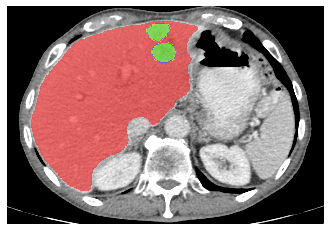

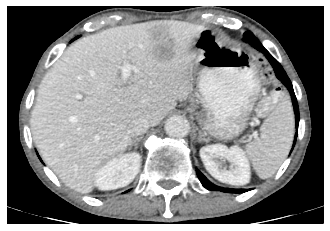

In [5]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/Dataset151_LiverSegmentation/imagesTr/volume-52_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/pred/LITS-Challenge-Traindata-131/3d_fullres_phantom_106_res/volume-52.nii.gz"
nii_gt_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/Dataset151_LiverSegmentation/labelsTr/volume-52.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/plots/example_images_phantom_training/volume-52"
z_slice = 130
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            flipr=False, flipud=True, delte_px = {
                                "bottom": 59,
                                "top": 0,
                                "left": 40,
                                "right": 40
                            })



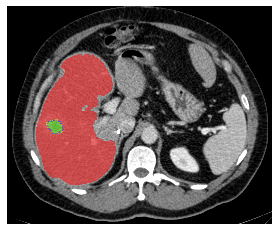

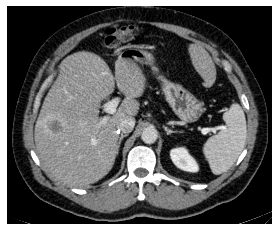

In [6]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/Dataset151_LiverSegmentation/imagesTr/volume-60_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/pred/LITS-Challenge-Traindata-131/3d_fullres_phantom_106_res/volume-60.nii.gz"
nii_gt_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/Dataset151_LiverSegmentation/labelsTr/volume-60.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/plots/example_images_phantom_training/volume-60"
z_slice = 188
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 69,
                                "top": 0,
                                "left": 17,
                                "right": 11
                            })



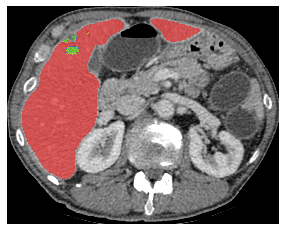

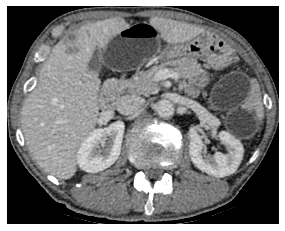

In [15]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/Dataset151_LiverSegmentation/imagesTr/volume-82_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/pred/LITS-Challenge-Traindata-131/3d_fullres_phantom_106/volume-82.nii.gz"
nii_gt_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/Dataset151_LiverSegmentation/labelsTr/volume-82.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/plots/example_images_phantom_training/volume-82"
z_slice = 370
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 20,
                                "top": 0,
                                "left": 0,
                                "right": 1
                            }, flipr=True, flipud=True)



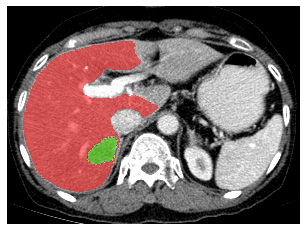

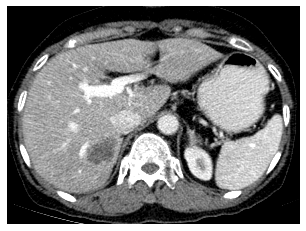

In [18]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/Dataset151_LiverSegmentation/imagesTr/volume-70_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/pred/LITS-Challenge-Traindata-131/3d_fullres_phantom_106/volume-70.nii.gz"
nii_gt_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/Dataset151_LiverSegmentation/labelsTr/volume-70.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/plots/example_images_phantom_training/volume-70"
z_slice = 265
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-100, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 50,
                                "top": 5,
                                "left": 0,
                                "right": 1
                            }, flipr=True, flipud=True)



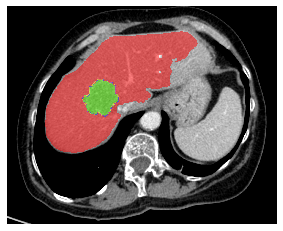

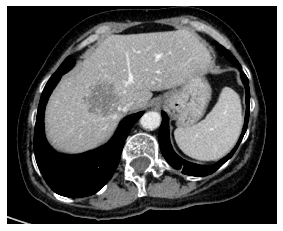

In [23]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/LITS-Challenge-Test-Data/test-volume-64_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/pred/LITS-Challenge-Testdata/3d_fullres_phantom_106_res/test-volume-64.nii.gz"
#nii_gt_path = "/run/media/uli/Games and Backups/documents/Dataset151_LiverSegmentation/labelsTr/test-volume-64.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/plots/example_images_phantom_training/test-volume-64"
z_slice = 455
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 74,
                                "top": 0,
                                "left": 35,
                                "right": 50
                            }, flipr=False, flipud=True)



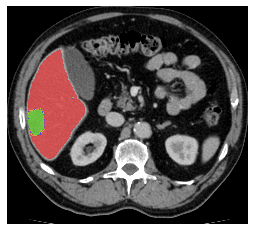

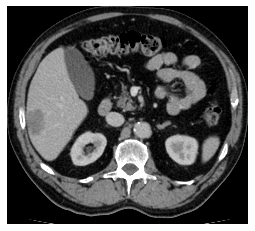

In [26]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/LITS-Challenge-Test-Data/test-volume-26_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/pred/LITS-Challenge-Testdata/3d_fullres_phantom_106_res/test-volume-26.nii.gz"
#nii_gt_path = "/run/media/uli/Games and Backups/documents/Dataset151_LiverSegmentation/labelsTr/test-volume-26.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/plots/example_images_phantom_training/test-volume-26"
z_slice = 80
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 65,
                                "top": 0,
                                "left": 0,
                                "right": 1
                            }, flipr=True, flipud=True)



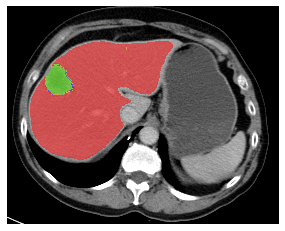

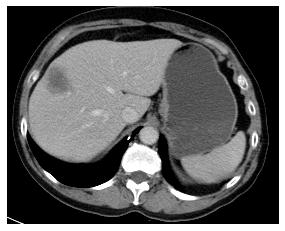

In [27]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/LITS-Challenge-Test-Data/test-volume-19_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/pred/LITS-Challenge-Testdata/3d_fullres_phantom_106_res/test-volume-19.nii.gz"
#nii_gt_path = "/run/media/uli/Games and Backups/documents/Dataset151_LiverSegmentation/labelsTr/test-volume-19.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/plots/example_images_phantom_training/test-volume-19"
z_slice = 69
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 56,
                                "top": 0,
                                "left": 0,
                                "right": 1
                            }, flipr=True, flipud=True)



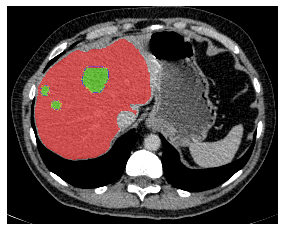

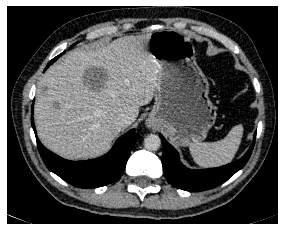

In [28]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/LITS-Challenge-Test-Data/test-volume-33_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/pred/LITS-Challenge-Testdata/3d_fullres_phantom_106_res/test-volume-33.nii.gz"
#nii_gt_path = "/run/media/uli/Games and Backups/documents/Dataset151_LiverSegmentation/labelsTr/test-volume-33.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/plots/example_images_phantom_training/test-volume-33"
z_slice = 590
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 30,
                                "top": 0,
                                "left": 0,
                                "right": 1
                            })
                        



/tmp/ipykernel_3886/2294969771.py:37: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  images[i] = ImageOps.fit(image, default_size, Image.ANTIALIAS)


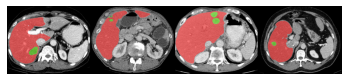

In [29]:
import pandas as pd
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask


images_train = ["volume-70", "volume-82", "volume-52", "volume-60", ]
images_test = ["test-volume-19", "test-volume-26", "test-volume-33", "test-volume-64"]
output_path = '/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/240110_LiTS/plots/example_images_phantom_training'
mask_color = 'RdYlGn'
mask_opacity = 0
delte_px = {
    "bottom": 135,
    "top": 120,
    "left": 80,
    "right": 110
}
bb_cutoff_dicom = None

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps

images = []
for image in images_train:
    image_path = os.path.join(output_path, f"{image}_with_mask.png")
    if os.path.exists(image_path):
        image_temp = Image.open(image_path)
        images.append(image_temp)
    else:
        print(f"{image}.png does not exist")

#unify image sizes
default_size = images[1].size
for i, image in enumerate(images):
    if image.size != default_size:
        images[i] = ImageOps.fit(image, default_size, Image.ANTIALIAS)
    # add black border to images 
    border = 10
    images[i] = ImageOps.expand(images[i], border, fill='black')

default_size = images[0].size
# create grid
grid = np.zeros(( (default_size[1])*1, (default_size[0])*len(images), 4), dtype=np.uint8)
for i, image in enumerate(images):
    start_x = i*(default_size[0]) 
    start_y = 0
    end_x = start_x + default_size[0] 
    end_y = start_y + default_size[1]
    grid[start_y:end_y,start_x:end_x, :] = image

grid = Image.fromarray(grid)
grid.save(os.path.join(output_path, f"combined_train_with_mask.png"))

# show grid
plt.imshow(grid)
plt.axis('off')
plt.show()


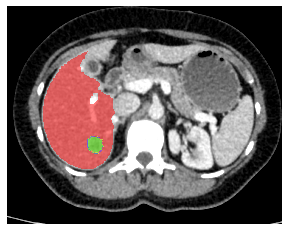

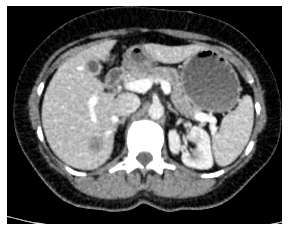

In [31]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/inhouse_data_liver_segmentation/Sgan522082433"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/data_liver_lesion_segmentation_inhouse/pred/3d_fullres_phantom_106_res/Sgan522082433.nii.gz"
#nii_gt_path = "/run/media/uli/Games and Backups/documents/Dataset151_LiverSegmentation/labelsTr/test-volume-64.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/data_liver_lesion_segmentation_inhouse/plots/example_images_phantom_training/Sgan522082433"
z_slice = 95
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 65,
                                "top": 0,
                                "left": 35,
                                "right": 40
                            }, flipr=False, flipud=False)



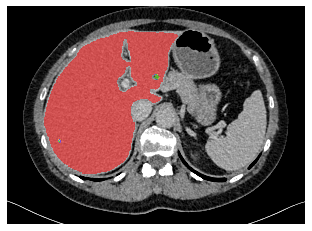

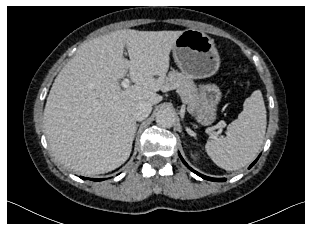

In [ ]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/inhouse_data_liver_segmentation/0042659824_22215"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/data_liver_lesion_segmentation_inhouse/pred/3d_fullres_phantom_106_res/0042659824_22215.nii.gz"
#nii_gt_path = "/run/media/uli/Games and Backups/documents/Dataset151_LiverSegmentation/labelsTr/test-volume-26.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/data_liver_lesion_segmentation_inhouse/plots/example_images_phantom_training/0042659824_22215"
z_slice = 896
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 75,
                                "top": 0,
                                "left": 0,
                                "right": 1
                            }, flipr=False, flipud=False)



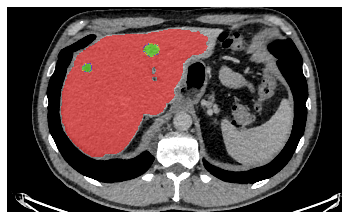

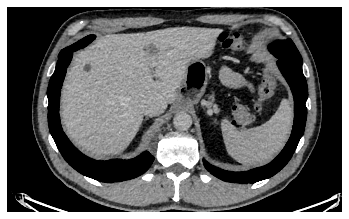

In [33]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/inhouse_data_liver_segmentation/70773664"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/data_liver_lesion_segmentation_inhouse/pred/3d_fullres_phantom_106_res/70773664.nii.gz"
#nii_gt_path = "/run/media/uli/Games and Backups/documents/Dataset151_LiverSegmentation/labelsTr/test-volume-26.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/data_liver_lesion_segmentation_inhouse/plots/example_images_phantom_training/70773664"
z_slice = 648
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 70,
                                "top": 0,
                                "left": 0,
                                "right": 1
                            }, flipr=False, flipud=False)



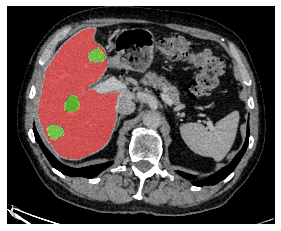

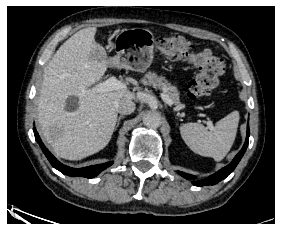

In [34]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom networks on patients
# use 262 for now
vol_path = "/run/media/uli/Games and Backups/documents/patient_datasets_full/inhouse_data_liver_segmentation/42825317"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/data_liver_lesion_segmentation_inhouse/pred/3d_fullres_phantom_106_res/42825317.nii.gz"
#nii_gt_path = "/run/media/uli/Games and Backups/documents/Dataset151_LiverSegmentation/labelsTr/test-volume-26.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/data_liver_lesion_segmentation_inhouse/plots/example_images_phantom_training/42825317"
z_slice = 567
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 70,
                                "top": 0,
                                "left": 0,
                                "right": 1
                            }, flipr=False, flipud=False)



In [ ]:
import pandas as pd
import os
from overlay_dicom_nii_mask import overlay_dicom_nii_mask


images_train = ["volume-70", "volume-82", "volume-52", "volume-60", ]
images_test = ["test-volume-19", "test-volume-26", "test-volume-33", "test-volume-64"]
output_path = 'home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/deep_learning/segmentation/datasets/patient_datasets/data_liver_lesion_segmentation_inhouse/plots/example_images_phantom_training'
mask_color = 'RdYlGn'
mask_opacity = 0
delte_px = {
    "bottom": 135,
    "top": 120,
    "left": 80,
    "right": 110
}
bb_cutoff_dicom = None

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps

images = []
for image in images_train:
    image_path = os.path.join(output_path, f"{image}_with_mask.png")
    if os.path.exists(image_path):
        image_temp = Image.open(image_path)
        images.append(image_temp)
    else:
        print(f"{image}.png does not exist")

#unify image sizes
default_size = images[1].size
for i, image in enumerate(images):
    if image.size != default_size:
        images[i] = ImageOps.fit(image, default_size, Image.ANTIALIAS)
    # add black border to images 
    border = 10
    images[i] = ImageOps.expand(images[i], border, fill='black')

default_size = images[0].size
# create grid
grid = np.zeros(( (default_size[1])*1, (default_size[0])*len(images), 4), dtype=np.uint8)
for i, image in enumerate(images):
    start_x = i*(default_size[0]) 
    start_y = 0
    end_x = start_x + default_size[0] 
    end_y = start_y + default_size[1]
    grid[start_y:end_y,start_x:end_x, :] = image

grid = Image.fromarray(grid)
grid.save(os.path.join(output_path, f"combined_train_with_mask.png"))

# show grid
plt.imshow(grid)
plt.axis('off')
plt.show()


In [ ]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom images used to train networks
vol_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/remote_server/HPC-Filetransfer/work/nnUNet_training/nnUNet_raw/Dataset106_LiverSegmentationPhantom/imagesTr/221025_phantom214_043_CT4_115_120_150_FC08_AIDR3D_105005.775_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/remote_server/HPC-Filetransfer/work/nnUNet_training/nnUNet_raw/Dataset106_LiverSegmentationPhantom/labelsTr/221025_phantom214_043_CT4_115_120_150_FC08_AIDR3D_105005.775.nii.gz"
#nii_gt_path = "/run/media/uli/Games and Backups/documents/Dataset151_LiverSegmentation/labelsTr/test-volume-64.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/remote_server/HPC-Filetransfer/work/nnUNet_training/example_images_phantom_training/221025_phantom214_043_CT4_115_120_150_FC08_AIDR3D_105005"
z_slice = 85
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 95,
                                "top": 0,
                                "left": 1,
                                "right": 1
                            }, flipr=False, flipud=False)



In [ ]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom images used to train networks
vol_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/remote_server/HPC-Filetransfer/work/nnUNet_training/nnUNet_raw/Dataset106_LiverSegmentationPhantom/imagesTr/240409_phantom252_meta_CT4_41_120_150_FC08_AIDR3D_171613.430_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/remote_server/HPC-Filetransfer/work/nnUNet_training/nnUNet_raw/Dataset106_LiverSegmentationPhantom/labelsTr/240409_phantom252_meta_CT4_41_120_150_FC08_AIDR3D_171613.430.nii.gz"
#nii_gt_path = "/run/media/uli/Games and Backups/documents/Dataset151_LiverSegmentation/labelsTr/test-volume-64.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/remote_server/HPC-Filetransfer/work/nnUNet_training/example_images_phantom_training/240409_phantom252_meta_CT4_41_120_150_FC08_AIDR3D_171613"
z_slice = 90
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 95,
                                "top": 0,
                                "left": 1,
                                "right": 1
                            }, flipr=False, flipud=False)



In [ ]:
import matplotlib
from overlay_dicom_nii_mask import get_patient_example_images

# pictures from phantom images used to train networks
vol_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/remote_server/HPC-Filetransfer/work/nnUNet_training/nnUNet_raw/Dataset106_LiverSegmentationPhantom/imagesTr/date_daol_daol_CT4_40_120_150_FC08_AIDR3D_190143.104_0000.nii.gz"
nii_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/remote_server/HPC-Filetransfer/work/nnUNet_training/nnUNet_raw/Dataset106_LiverSegmentationPhantom/labelsTr/date_daol_daol_CT4_40_120_150_FC08_AIDR3D_190143.104.nii.gz"

output_path = "/home/uli/data/Insync/uligenske@gmail.com/Google Drive/arbeit/remote_server/HPC-Filetransfer/work/nnUNet_training/example_images_phantom_training/date_daol_daol_CT4_40_120_150_FC08_AIDR3D_190143"
z_slice = 340
color_scale = matplotlib.colormaps['prism']
mask_opacity = 0.5
get_patient_example_images(vol_path, nii_path, output_path, 
                            z_slice, color_scale, mask_opacity, show=True, 
                            bb_cutoff_dicom=-20, mask_labels_to_ignore=[],
                            delte_px={
                                "bottom": 95,
                                "top": 0,
                                "left": 1,
                                "right": 1
                            }, flipr=False, flipud=False)

